# 보스턴 하우싱 데이터 분석

이 예에서는 보스턴 하우싱 데이터를 조사해보겠다.

1978년, 경제학자인 [David Harrison](http://www.nera.com/experts/dr-david-harrison-jr.html)과 [Daniel Rubinfield](https://www.law.berkeley.edu/our-faculty/faculty-profiles/daniel-rubinfeld/)는 다음의 [논문](http://www.colorado.edu/ibs/crs/workshops/R_1-11-2012/root/Harrison_1978.pdf) 에서 보스턴 지역의 공기의 품질과 부동산 가격의 관계를 분석하는 내용을 발표했고 이는 1300회 이상 인용되었다([1300 times](https://scholar.google.co.kr/scholar?um=1&ie=UTF-8&lr&cites=13412889939065541163)) 이 논문에서 사용한 [데이터셋](http://www.census.gov/geo/reference/gtc/gtc_ct.html)은 1970년의 보스턴 센서스[1970 Boston census](https://www2.census.gov/prod2/decennial/documents/39204513p3ch05.pdf) 데이터를 이용한 것인데, 이데이터는 이후 여러가지 데이터 분석 방법들의 성능을 비교하는 목적으로 사용되고 있다.

최초의 데이터 셋은 카네기 멜론 대학의 데이터 저장소 [StatLib](http://lib.stat.cmu.edu/datasets/)에서 소개되었다[boston](http://lib.stat.cmu.edu/datasets/boston). 이 데이터는 편의상 "Boston Housing" 데이터라고 불린다.

각 센서는 506개의 샘플이 있으며 각 샘플은 다음과 같이 14개의 값을 측정하였다:

| Name    | Meaning                                                               |
|---------|-----------------------------------------------------------------------|
| CRIM    | per capita crime rate by town                                         |
| ZN      | proportion of residential land zoned for lots over 25,000 sq.ft.      |
| INDUS   | proportion of non-retail business acres per town                      |
| CHAS    | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX     | nitric oxides concentration (parts per 10 million)                    |
| RM      | average number of rooms per dwelling                                  |
| AGE     | proportion of owner-occupied units built prior to 1940                |
| DIS     | weighted distances to five Boston employment centres                  |
| RAD     | index of accessibility to radial highways                             |
| TAX     | full-value property-tax rate per \$10,000                             |
| PTRATIO | pupil-teacher ratio by town                                           |
| B       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town        |
| LSTAT   | % lower status of the population                                      |
| MEDV    | Median value of owner-occupied homes in \$1000's                      |

그런데 이 데이터에는 문제가 있었는데, 1996년에 경제학자인 [Otis Gilley](http://www.business.latech.edu/gilley/)와 [R. Kelley Pace](https://business.lsu.edu/Finance/Pages/FacultyMember.aspx?UN=kpace)는 다음과 같은 [논문](http://spatial-statistics.com/pace_manuscripts/jeem_ms_dir/pdf/fin_jeem.pdf)을 발표하여 이 데이터와 실제 센서스 데이터를 비교하여 두가지 이슈를 찾아냈다: 먼저 8개의 샘플에서 median household values (MEDV)가 잘 못 기록되었고 16개의 샘플에서 MEDV의 임계치가 5만불 이상으로 설정된 것이 잘 못 적용된 것을 발견했다. 

그들은 잘못 기록된 데이터를 정정하였고, 그 결과 Harrison과 Rubinfield이 제시한 분석방법의 성능이 조금 향상된 것을 알아냈다. 다음해에 그들은 다른 [논문](http://link.springer.com/article/10.1023/A:1007762613901)을 발표했는데, 여기서 센서스 구역을 나타내는 id, 구역의 경도 및 위도 값, 해당지역 명칭 등을 분석에 도입하였다. 이를 통해서 인접한 지역은 유사한 값을 갖는다는 가정을 사용하여 보다 정확한 예측이 가능한 것을 보였다.

위와 같은 수정을 한 새로운 데이터셋을 [boston_corrected](http://lib.stat.cmu.edu/datasets/boston_corrected.txt)"로 다시 업로드하였다. 

이 데이터셋에는 506개의 샘플이 있고 아래과 같이 7개의 변수가 추가되었다:

| Name  | Meaning                                                                                                    |
|-------|-------------------------------------------------------------------------------------------------------------------------------------------|
| OBS.  | Observation number (the first example is 1, the second example is 2, and so on)                                                                   |
| TOWN  | The name of the corresponding town                                                                                                        |
| TOWN# | The number of the corresponding town (the first town is 1, the second town is 2, and so on); each town can contain multiple census tracts |
| TRACT | The id of the census tract as defined by the 1970 census                                                                                  |
| LAT   | The latitude coordinate of the census tract (unclear where within the tract this is)                                                      |
| LONG  | The longitude coordinate of the census tract (unclear where within the tract this is)                                                     |
| CMEDV | The corrected median value of owner-occupied homes in \$1000's  (different from MEDV in 8 instances)                                      |

데이터수집 프로그램에서 소개한 load_boston_housing() 함수를 이용하여 데이터를 로드하겠다.

In [4]:
from data.load_boston_housing import load_boston_housing
data = load_boston_housing()

First, let's look at the distribution of values we care about most: CMEDV.

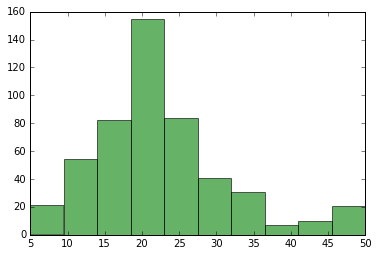

In [7]:
import matplotlib.pyplot as plt
# %matplotlib inline 그림이 화면에 나타나지 않을 경우에 필요하다

cmedv = data['CMEDV'].values.tolist()
# alpha=0.6 컬럼의 opacity를 조절함
# color='g' 색을 디폴트색인 파란색에서 녹색으로 바꿈
plt.hist(cmedv, alpha=0.6, color='g') 
plt.show()

그림을 보면 데이터는 스키니한 [정규분포](https://en.wikipedia.org/wiki/Normal_distribution)를 따르며 값이 45, 50인 곳에서 다소 변동이 있는 것을 알 수 있다. 특히 50 근처에서 값이 크게 나타나는 이유는 50,000 달러 이상의 값을 모두 50으로 하향 조정했기 때문일 것으로 추정된다. 

이제 데이터가 정규 분포를 따른다고 가정하고 처리를 하겠다.

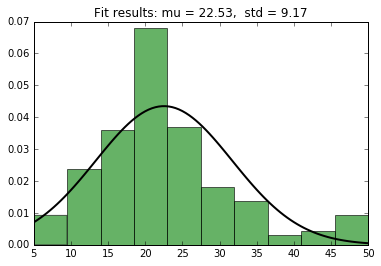

In [8]:
from scipy.stats import norm
import numpy as np

# 아래 코드는 아래의 사이트를 참조하였다
# http://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data

# 히스토그램을 그려준다
# normed = True 로 설정하면 각 빈의 (height * width) 값들의 합이 1이 되도록 정규화 한다

mu, std = norm.fit(cmedv)
plt.hist(cmedv, normed=True, alpha=0.6, color='g')

# 확률분포 함수를 그린다.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

이제 데이터가 상당히 정규분포에 가깝게 보이는 것을 알 수 있다. 원래 데이터의 히스토그램을 살펴보겠다.

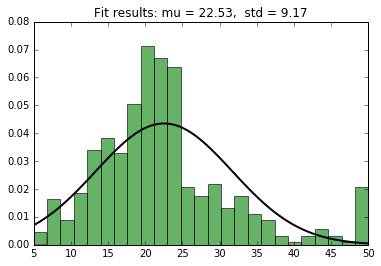

In [9]:
plt.hist(cmedv, bins=25, normed=True, alpha=0.6, color='g') 

xmin, xmax = plt.xlim()
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

더 자세히 히스토그램을 분해해보겠다.

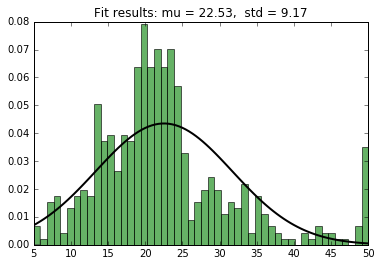

In [10]:
plt.hist(cmedv, bins=50, normed=True, alpha=0.6, color='g') 
xmin, xmax = plt.xlim()
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

이 그림을 보면 이제 정규분포의 모습이 나타나지 않는 것을 알 수 있다. 즉, 히스토그램에서 빈 (한 칸)의 폭을 어떻게 정하는 가에 따라 데이터의 분포는 다르게 보일 수 있다는 것을 주의해야 한다. 즉, 적당한 크기의 빈을 선택해야 한다.

이제 다른 변수의 변화를 보겠다. nitric oxides concentration인데 이는 천만분의 1 단위로 표현되어 있다.

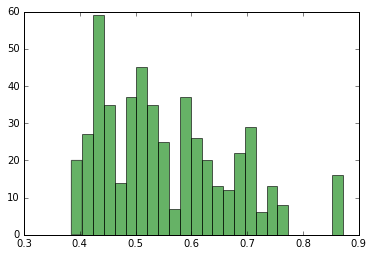

In [11]:
nox = data['NOX'].values.tolist()
plt.hist(nox, bins=25, alpha=.6, color='g')
plt.show()

이 그림을 보면 뭔가 분명한 패턴이 보이지 않는다. 기본적인 수치 데이터, 예를 들면, minimum, maximum, mode, median, mean 값을 살펴보겠다.

In [12]:
from collections import Counter

min_nox = min(nox)
max_nox = max(nox)
counted_nox = Counter(nox) 
# 상위 5개, 10개 등으로 데이터를 살펴볼 수 있다
# 또는 가장 빈도수가 높은 값/ 빈도수가 낮은 값의 비율 등을 계산하는데도 사용된다.

mode_nox = list(counted_nox.keys())[0] 
# 파이선3에서 .keys()는 dict_keys 객체를 얻는데, 이 객체에는 직접 인덱스로 액세스할 수 없다.
median_nox = np.median(nox)
mean_nox = np.mean(nox)

print("NOX: min {:.02f} to max {:.02f} with mode {:.02f}, median {:.02f}, and mean {:.02f}".format(min_nox, max_nox, mode_nox, median_nox, mean_nox))

NOX: min 0.39 to max 0.87 with mode 0.54, median 0.54, and mean 0.55


위와 같이 mean, median, mode 값들이 매우 가깝게 나타는 경우는 드문 경우이다. 위에 설명한 작업들을 이제 함수로 만들고 다른 변수들에 대해서도 같은 수치를 파악해보겠다.

In [13]:
def analyze(column):
    col_data = data[column].values.tolist()
    min_data = min(col_data)
    max_data = max(col_data)
    counted_data = Counter(col_data)
    mode_data = list(counted_data.keys())[0]
    median_data = np.median(col_data)
    mean_data = np.mean(col_data)
    print("{}: min {:.02f} to max {:.02f} with mode {:.02f}, median {:.02f}, and mean {:.02f}".format(
            column, min_data, max_data, mode_data, median_data, mean_data))

columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "CMEDV"]

for column in columns:
    analyze(column)

CRIM: min 0.01 to max 88.98 with mode 0.13, median 0.26, and mean 3.61
ZN: min 0.00 to max 100.00 with mode 0.00, median 0.00, and mean 11.36
INDUS: min 0.46 to max 27.74 with mode 0.74, median 9.69, and mean 11.14
CHAS: min 0.00 to max 1.00 with mode 0.00, median 0.00, and mean 0.07
NOX: min 0.39 to max 0.87 with mode 0.54, median 0.54, and mean 0.55
RM: min 3.56 to max 8.78 with mode 5.53, median 6.21, and mean 6.28
AGE: min 2.90 to max 100.00 with mode 68.80, median 77.50, and mean 68.57
DIS: min 1.13 to max 12.13 with mode 2.55, median 3.21, and mean 3.80
RAD: min 1.00 to max 24.00 with mode 1.00, median 5.00, and mean 9.55
TAX: min 187.00 to max 711.00 with mode 256.00, median 330.00, and mean 408.24
PTRATIO: min 12.60 to max 22.00 with mode 17.00, median 19.05, and mean 18.46
B: min 0.32 to max 396.90 with mode 2.60, median 391.44, and mean 356.67
LSTAT: min 1.73 to max 37.97 with mode 1.98, median 11.36, and mean 12.65
CMEDV: min 5.00 to max 50.00 with mode 34.70, median 21.20, 

위의 데이터를 서로 다른 변수들의 결과와 비교하여 보면 흥미있는 결과를 알아낼 수 있다. 예를 들어 "B" 변수를 보면, 최소값은 .32 이나 평균과 미디언 값은 350이 넘는 것을 알 수 있다. CMEDV의 최소 값은 5,000이고 최대값은 50,000인 것을 알 수 있으며 CRIM의 최대값 88.98은 매우 큰 값으로 이상치 인 것으로 추정된다.

또한 CHAS 값을 보면 최소값이 0 최대값이 1 인 것으로 보아 이는 수치 데이터가 아니라 카테고리(범주)를 나타내는 변수라고 추정된다. 이 외에도 어떤 값들은 수치 데이터로 취급될 것이 아니라 범주형 데이터일 것으로 추정할 수 있다. ZN 이나 RAD 변수도 자세히 살펴볼 필요가 있다. 이제 이들의 값을 살펴보겠다.


In [14]:
chas = Counter(data['CHAS'].values.tolist())
zn = Counter(data['ZN'].values.tolist())
rad = Counter(data['RAD'].values.tolist())

print("CHAS: {}".format(chas.keys()))
print("ZN: {}".format(zn.keys()))
print("RAD: {}".format(rad.keys()))

CHAS: dict_keys([0, 1])
ZN: dict_keys([0.0, 70.0, 75.0, 12.5, 34.0, 80.0, 17.5, 82.5, 20.0, 21.0, 22.0, 25.0, 90.0, 28.0, 30.0, 95.0, 33.0, 18.0, 35.0, 100.0, 40.0, 45.0, 52.5, 55.0, 60.0, 85.0])
RAD: dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 24])


이 값들의 의미를, 변수를 정의한 문서를 참고하여 분석할 필요가 있다. ZN 값은 퍼센트 값을 나타내며 CHAS와 RAD는 카테고리 변수임을 알 수 있다. 이와 같이 변수들의 성격을 파악하는 것은 데이터 분석시에 어떤 알고리즘을 선택할지를 판단하는데 매우 중요하며 분석을 위해서 데이터를 준비하는 과정에서도 중요한 단계이다.

수치형 또는 범주형 데이터의 속성을 파악하는 방법은 매우 많다. 또한 이들 변수가 어떤 관계에 있느지를 파악하는 것도 필요한데. 예를 들어 찰스 강 주변인지를 나타내는 카테고리 변수가 가치에 어떤 영향을 주는지 등이다. 이들 변수가 서로 상관관계에 있는지가 중요한 기준이 된다. 모든 변수들은 서로 관계를 가질 수 있으며 얼마나 영향을 주는지가 의미를 갖는다. 또한 수치형 변수들이 정규 분포를 따르는지, 로그노멀 분포를 따르는지, 파워로 분포를 따르는지 또는 임의의 분포를 갖는지 등을 파악하는 것이 분석의 기초가 된다.

데이터를 탐색하는 과정에서는 많은 질문을 가질수록 다양하게 데이터를 탐색해볼 수 있다. 즉, 다양한 가능성을 추측해보는 것이 필요하다. 데이터를 다양하게 탐색할수록 데이터를 더 잘 이해할 수 있게 되며, 더 우수한 데이터 분석결과를 얻을 수 있게 된다.